In [1]:
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

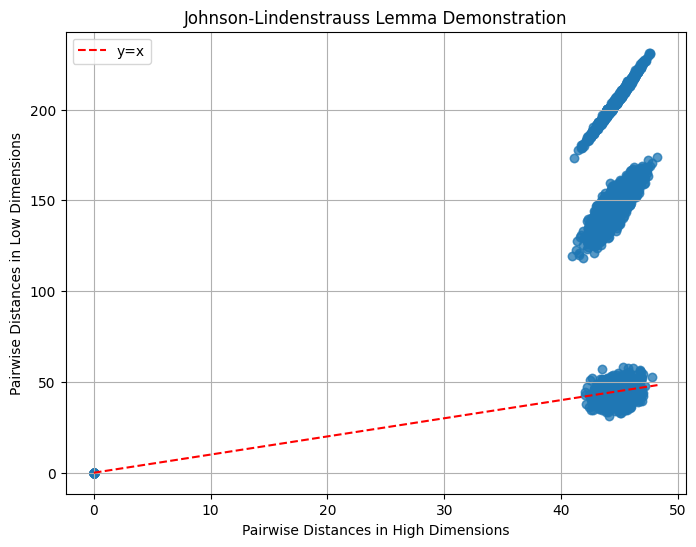

50

In [3]:


# Step 1: Create a high-dimensional dataset
np.random.seed(42)  # Set seed for reproducibility
d = 1000  # High-dimensional space
N = 100 # Number of points
X_high_dim = np.random.randn(N, d)  # Random points in high-dimensional space

# Step 2: Project down to a lower-dimensional space using a random projection
epsilon = 0.1  # Distortion tolerance
k = johnson_lindenstrauss_min_dim(n_samples=N, eps=epsilon)  # Calculate minimum projection dimension
k = 50
# Gaussian random projection
transformer = GaussianRandomProjection(n_components=k, random_state=42)
X_low_dim = transformer.fit_transform(X_high_dim)

# Step 3: Calculate pairwise distances in both high and low dimensions
from sklearn.metrics.pairwise import euclidean_distances

# Calculate pairwise distances
distances_high = euclidean_distances(X_high_dim)
distances_low = euclidean_distances(X_low_dim)

# Step 4: Plot the comparison of the pairwise distances
# Compare pairwise distances in the high-dimensional space vs. the low-dimensional space
plt.figure(figsize=(8, 6))
plt.scatter(distances_high.flatten(), distances_low.flatten(), alpha=0.5)
plt.plot([distances_high.min(), distances_high.max()],
         [distances_high.min(), distances_high.max()],
         color='red', linestyle='--', label='y=x')

plt.title('Johnson-Lindenstrauss Lemma Demonstration')
plt.xlabel('Pairwise Distances in High Dimensions')
plt.ylabel('Pairwise Distances in Low Dimensions')
plt.legend()
plt.grid(True)
plt.show()

# Output the reduced dimension k
k
